In [1]:
# Import other libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')


# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy

In [2]:
# Load the CSV files from Scopus
docs_springer = litstudy.load_springer_csv('NBS_NbS_Carbon_Climate Change_Restoration Ecology.csv')
print(len(docs_springer), 'papers loaded from Scopus')

docs_csv = docs_springer

DocumentSet = docs_springer






1808 papers loaded from Scopus


In [238]:
# Import Pybliometrics to Enrich Paper Metadata
import pybliometrics

In [243]:
>>> pybliometrics.scopus.utils.create_config()

Creating config file at C:\Users\sasteven\.pybliometrics\config.ini with default paths...
Please enter your API Key(s), obtained from http://dev.elsevier.com/myapikey.html.  Separate multiple keys by comma:
34391394d9c9809da19585e21c49ee84
API Keys are sufficient for most users.  If you have an InstToken, please enter the token now; otherwise just press Enter:

Configuration file successfully created at C:\Users\sasteven\.pybliometrics\config.ini
For details see https://pybliometrics.rtfd.io/en/stable/configuration.html.


In [6]:
#Enrich Paper Metadata Using Crossref
refine_crossref(docs_springer)

NameError: name 'refine_crossref' is not defined

In [244]:
# Enrich Paper Metadata Command
import logging
logging.getLogger().setLevel(logging.CRITICAL)

print(len(docs_springer), 'papers found on Scopus')

docs_springer = litstudy.refine_scopus(docs_springer)


1808 papers found on Scopus


 16%|████████████▍                                                                  | 285/1808 [00:54<04:52,  5.21it/s]


Scopus400Error: Exceeds the maximum number allowed for the service level

In [3]:
corpus = litstudy.build_corpus(docs_springer, ngram_threshold=0.8)

In [4]:
litstudy.compute_word_distribution(corpus).filter(like='_', axis=0).sort_index

<bound method DataFrame.sort_index of                       count
nature_solutions        392
climate_change          108
ecosystem_services       75
case_study               71
constructed_wetlands     26
life_cycle               12
decision_making          11
long_term                10
sea_level                10
united_states             9
circular_economy          8
remote_sensing            7
trade_offs                6
lessons_learned           6
latin_america             6
semi_arid                 5
state_art                 5
salt_marsh                5>

In [40]:
DataFrame = litstudy.compute_word_distribution(corpus).sort_index()
excel_writer = pd.ExcelWriter(r"C:\Users\sasteven\keywordsAFONLYBigram08.xlsm")
DataFrame.to_excel(excel_writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=excel_writer, merge_cells=True, inf_rep='inf', freeze_panes=None, storage_options=None)


In [41]:
DataFrame.to_excel(excel_writer, sheet_name='Sheet1')

workbook = excel_writer.book
workbook.filename = 'test.xlsm'

excel_writer.save()

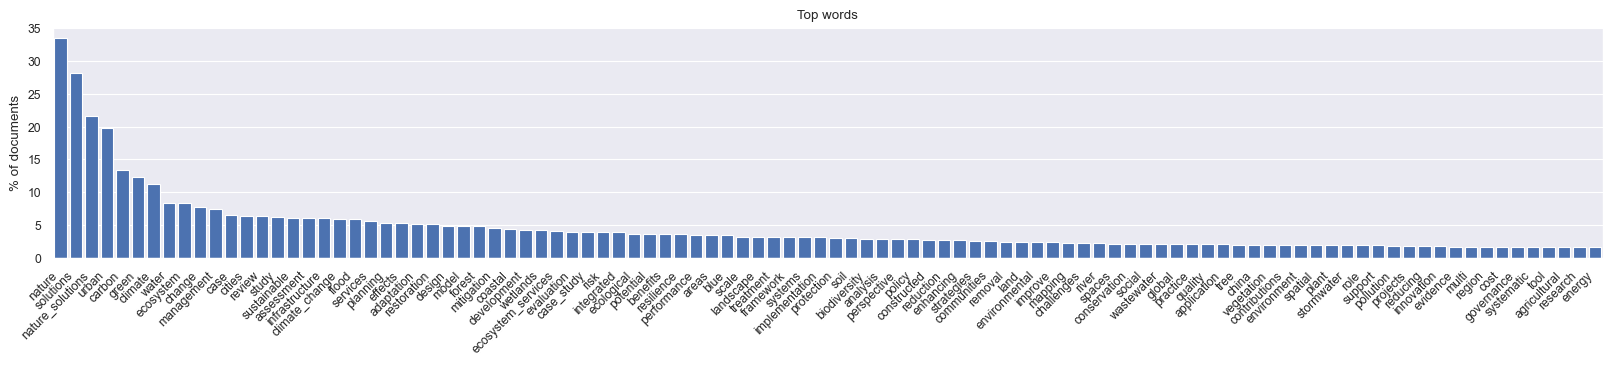

In [5]:
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, limit=100, title="Top words", vertical=True, label_rotation=45);

In [12]:
num_topics = 26
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=250)

In [13]:
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

Topic 1: ['wetlands', 'constructed', 'treatment', 'constructed_wetlands', 'wastewater']
Topic 2: ['ecological', 'restoration', 'innovation', 'social', 'sea']
Topic 3: ['application', 'properties', 'flood', 'catchment', 'model']
Topic 4: ['soil', 'effects', 'bioengineering', 'plant', 'loss']
Topic 5: ['nature_solutions', 'solutions', 'nature', 'cities', 'governance']
Topic 6: ['communities', 'gardens', 'diversity', 'engagement', 'plant']
Topic 7: ['green', 'infrastructure', 'blue', 'roofs', 'urban']
Topic 8: ['risk', 'flood', 'reduction', 'management', 'reducing']
Topic 9: ['resilience', 'building', 'contributions', 'practice', 'cities']
Topic 10: ['case', 'study', 'case_study', 'italy', 'comparative']
Topic 11: ['sustainable', 'areas', 'development', 'protection', 'goals']
Topic 12: ['carbon', 'blue', 'sequestration', 'removal', 'aqueous']
Topic 13: ['coastal', 'protection', 'environment', 'engineering', 'structures']
Topic 14: ['landscape', 'forest', 'management', 'perspective', 'mult

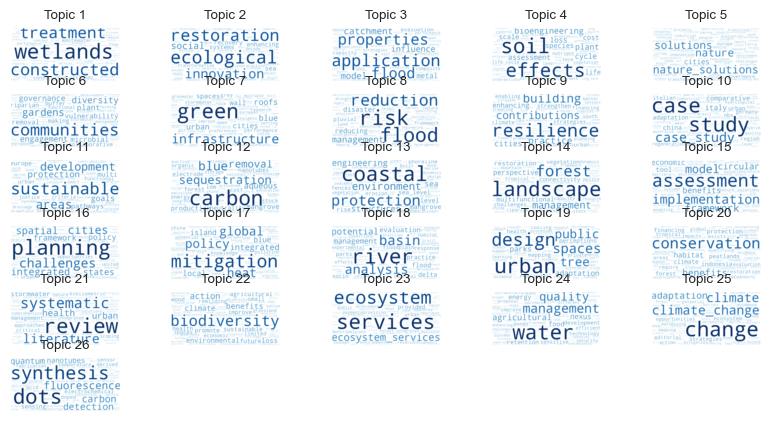

In [14]:
plt.figure(figsize=(10, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5);

C:\Users\sasteven\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\sasteven\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


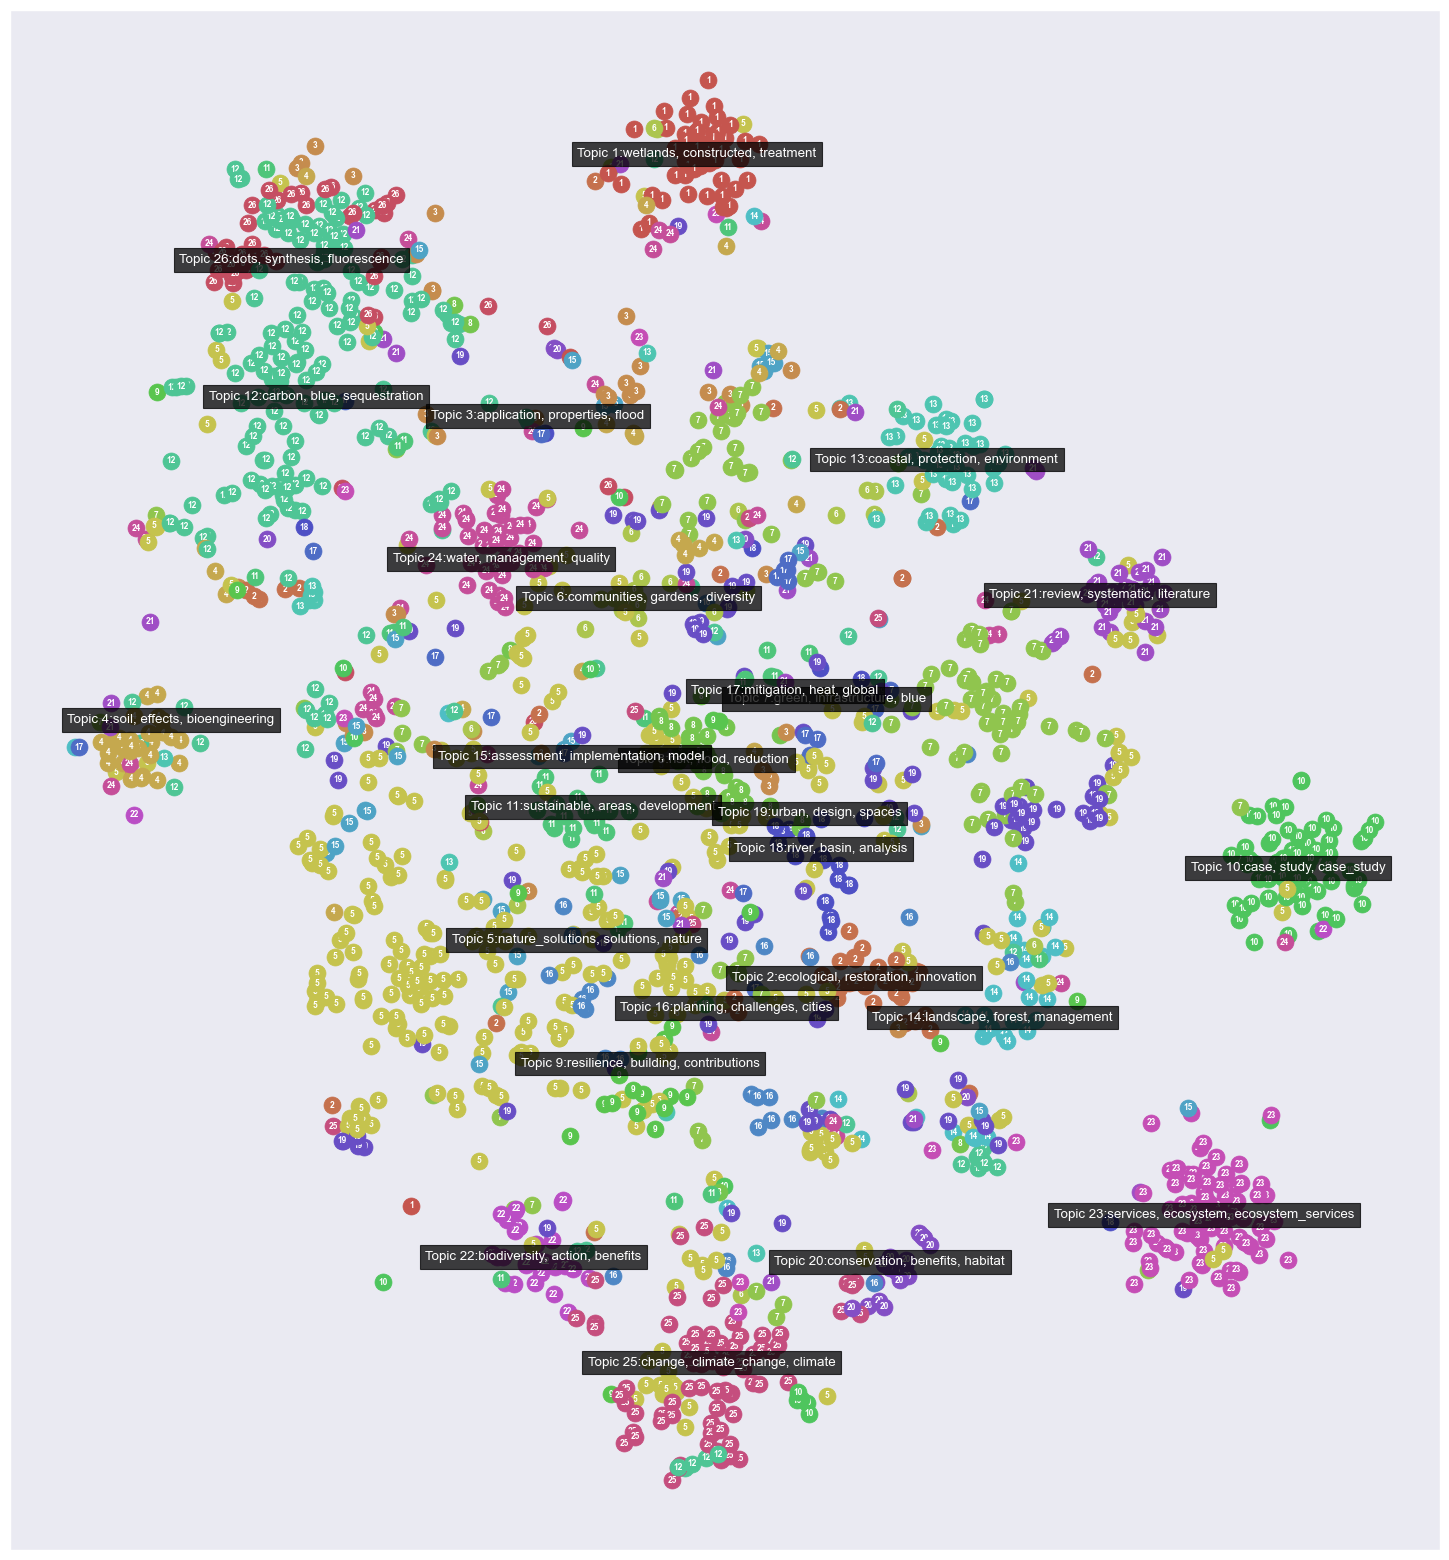

In [81]:
plt.figure(figsize=(30, 20))
litstudy.plot_embedding(corpus, topic_model);